In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fd = sns.load_dataset('flights')

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
fd.shape
fd.head()
fd.tail()
fd.info()
fd.describe()

(144, 3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


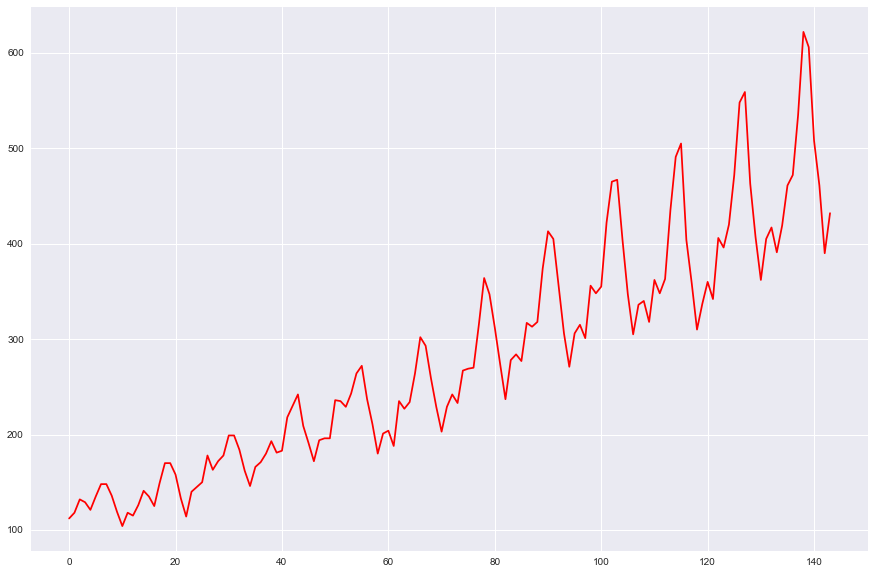

In [12]:
plt.figure(figsize=(15,10))
plt.plot(fd.passengers, 'r')
plt.show();

In [14]:
flight_data = fd.pivot('month','year','passengers')

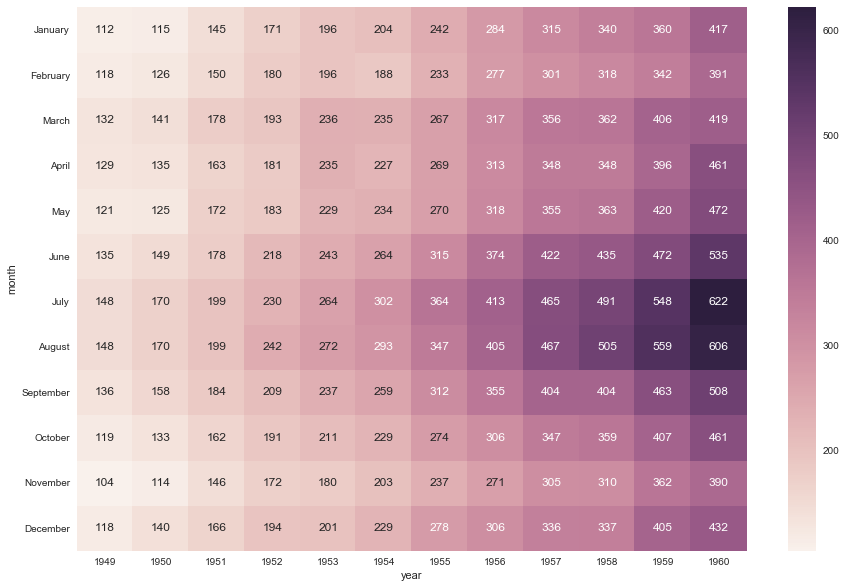

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(flight_data, annot=True, fmt = "d")
plt.show();

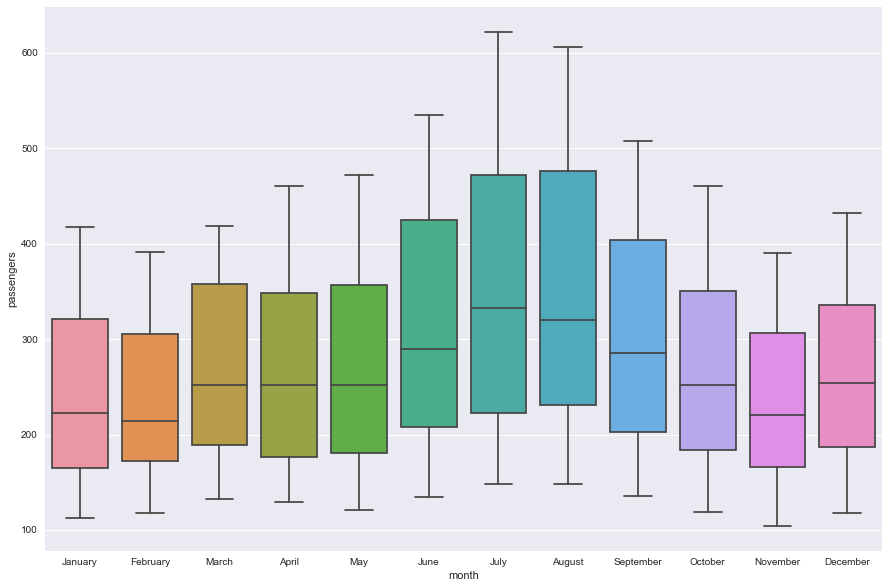

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'month', y = 'passengers', data = fd)
plt.show();

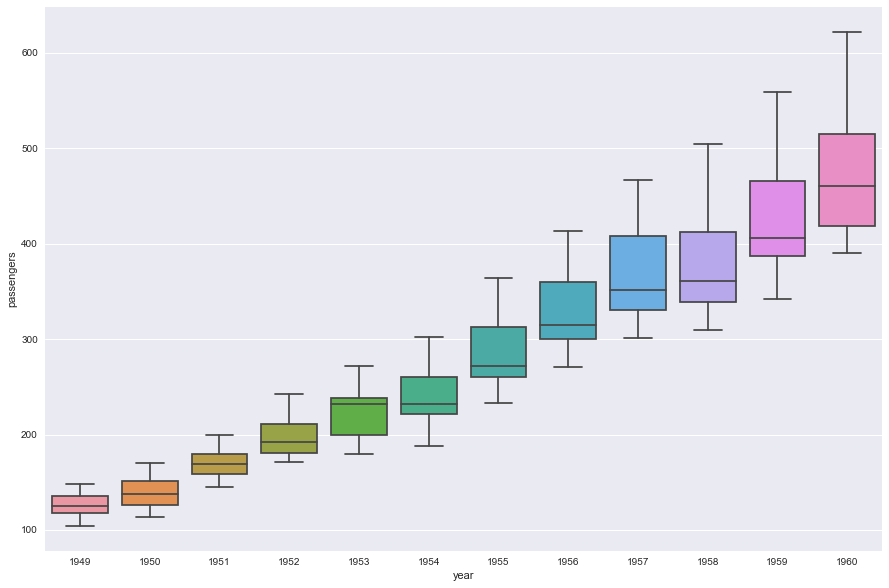

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'year', y = 'passengers', data = fd)
plt.show();

In [18]:
#Simple moving average
pd.rolling_mean(fd.passengers,12)

C:\Users\Raceclass59\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11     126.666667
12     126.916667
13     127.583333
14     128.333333
15     128.833333
16     129.166667
17     130.333333
18     132.166667
19     134.000000
20     135.833333
21     137.000000
22     137.833333
23     139.666667
24     142.166667
25     144.166667
26     147.250000
27     149.583333
28     153.500000
29     155.916667
          ...    
114    376.333333
115    379.500000
116    379.500000
117    380.500000
118    380.916667
119    381.000000
120    382.666667
121    384.666667
122    388.333333
123    392.333333
124    397.083333
125    400.166667
126    404.916667
127    409.416667
128    414.333333
129    418.333333
130    422.666667
131    428.333333
132    433.083333
133    437.166667
134    438.250000
135    443.666667
136    448.000000
137    453.250000
138    459

C:\Users\Raceclass59\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """Entry point for launching an IPython kernel.


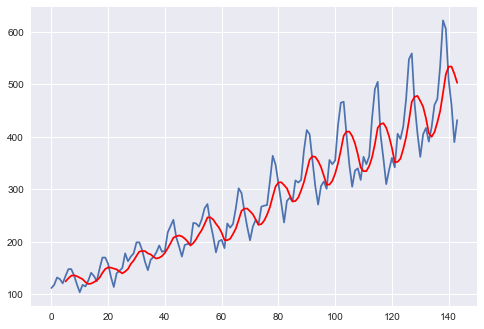

In [21]:
ma = pd.rolling_mean(fd.passengers,6) #6 periods moving average
plt.plot(fd.passengers)
plt.plot(ma, 'r')
plt.show();

In [22]:
exp = pd.ewma(fd.passengers,halflife=6)

C:\Users\Raceclass59\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=6,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


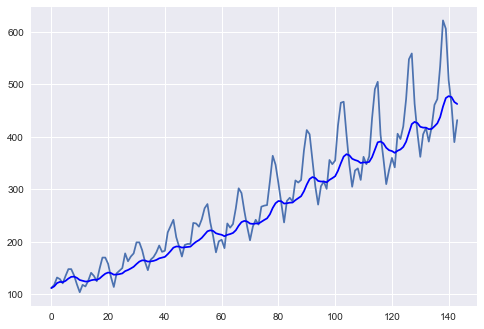

In [23]:
plt.plot(fd.passengers)
plt.plot(exp, 'b')
plt.show();

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
fd.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [26]:
months = pd.date_range('19490101', periods=144, freq='M')
months

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [27]:
fd['index'] = months
fd.head()
fd = fd.set_index('index')
fd.head()

,year,month,passengers,index
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


,year,month,passengers
index,,,
1949-01-31,1949,January,112
1949-02-28,1949,February,118
1949-03-31,1949,March,132
1949-04-30,1949,April,129
1949-05-31,1949,May,121


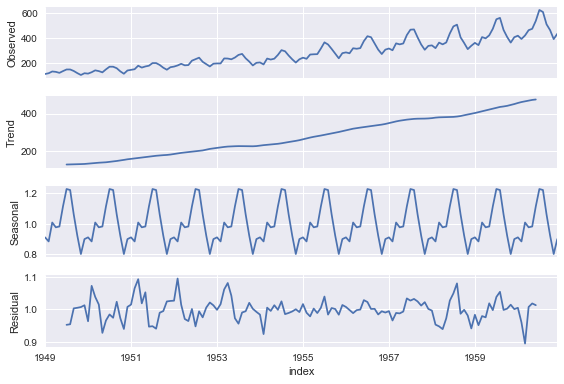

In [29]:
result = seasonal_decompose(fd.passengers, model = 'multiplicative')
result.plot()
plt.show();

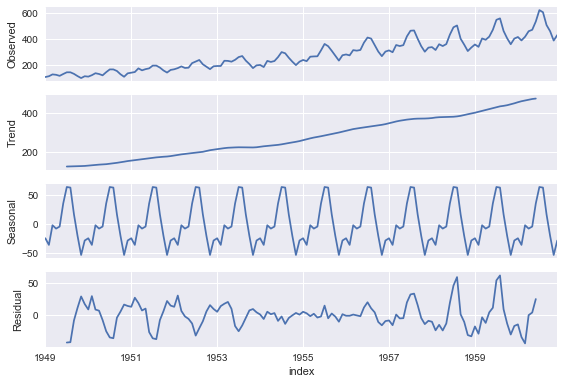

In [30]:
result = seasonal_decompose(fd.passengers, model = 'additive')
result.plot()
plt.show();

In [31]:
# Augmented Dickey Fuller Test - to find out whether time series is stationary or not
# H0: Time series is non-stationary
# Ha: Time series is stationary
from pandas import Series
from statsmodels.tsa.stattools import adfuller
adfuller(fd.passengers)

(0.81536887920605061,
 0.99188024343764103,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 996.69293083901903)

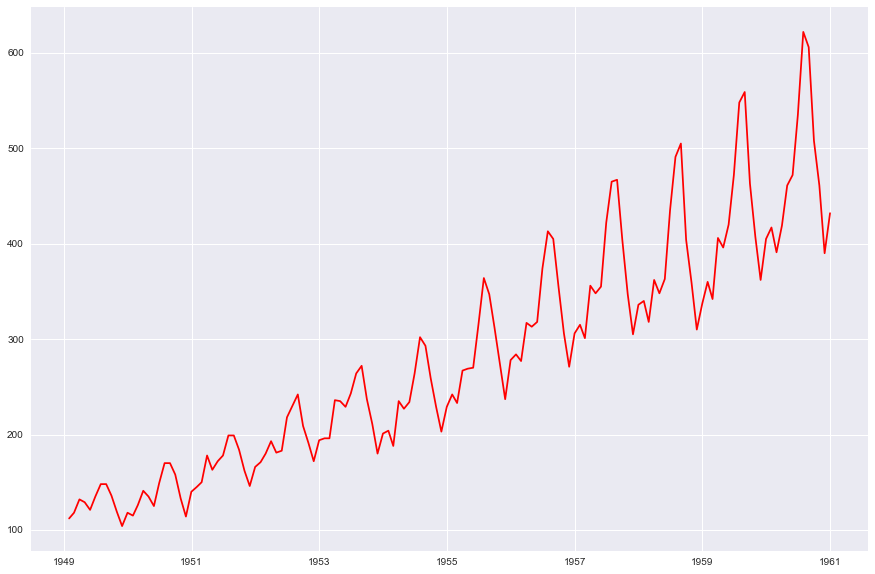

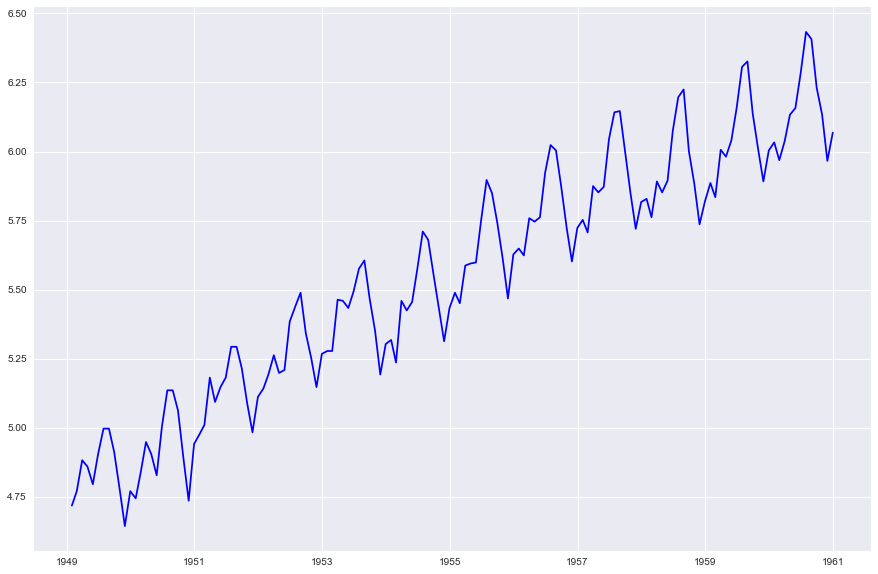

In [33]:
# Fix the variance with the help of log conversion
plt.figure(figsize=(15,10))
plt.plot(fd.passengers, 'r')
plt.show();

plt.figure(figsize=(15,10))
plt.plot(np.log(fd.passengers), 'b')
plt.show();